# 1.Problem Framing

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. We have data of 768  patients with some medical measurements. The objective is to predict whether a person is diabetic or not based on diagnostic measurements.

Since it is a supervised classfication Problem we can work with KNN.

Here we will train 80% data and then test it on rest.Apart of that there will be a fucntion in the end where use just need to provide measurement inputs and then model will predict whether a person is diabetic or not.

Target Variable is 'Outcome' column, where 1 means diabetic and 0 is not diabetics

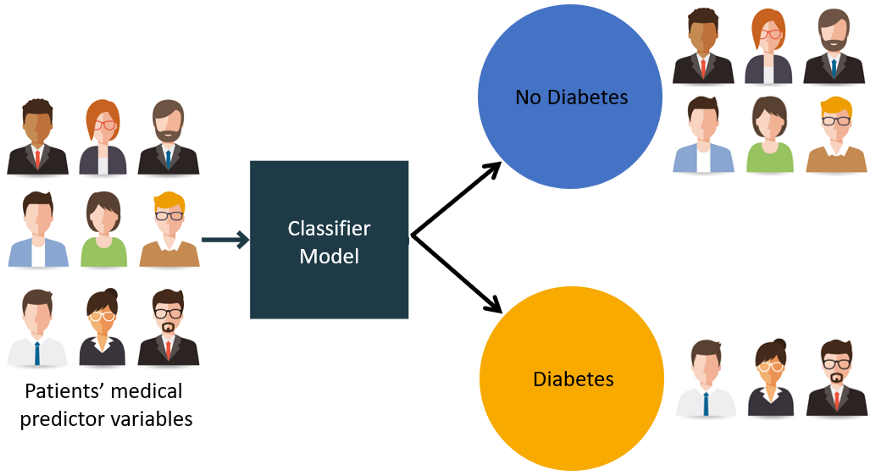

# 2.Importing data set and libraries

In [106]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scikit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [107]:
data=pd.read_csv(r'C:\Users\esvit\Downloads\Downloads\data science\data\diabetes (1).csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
data.shape

(768, 9)

In [109]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# 3.EDA 

3.1 Before EDA let's do some data cleaning

In [110]:
#checking duplicacy
data.duplicated().sum()

0

In [111]:
#format of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
#checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data is cleaned

3.2 VISUALISATION

In [113]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


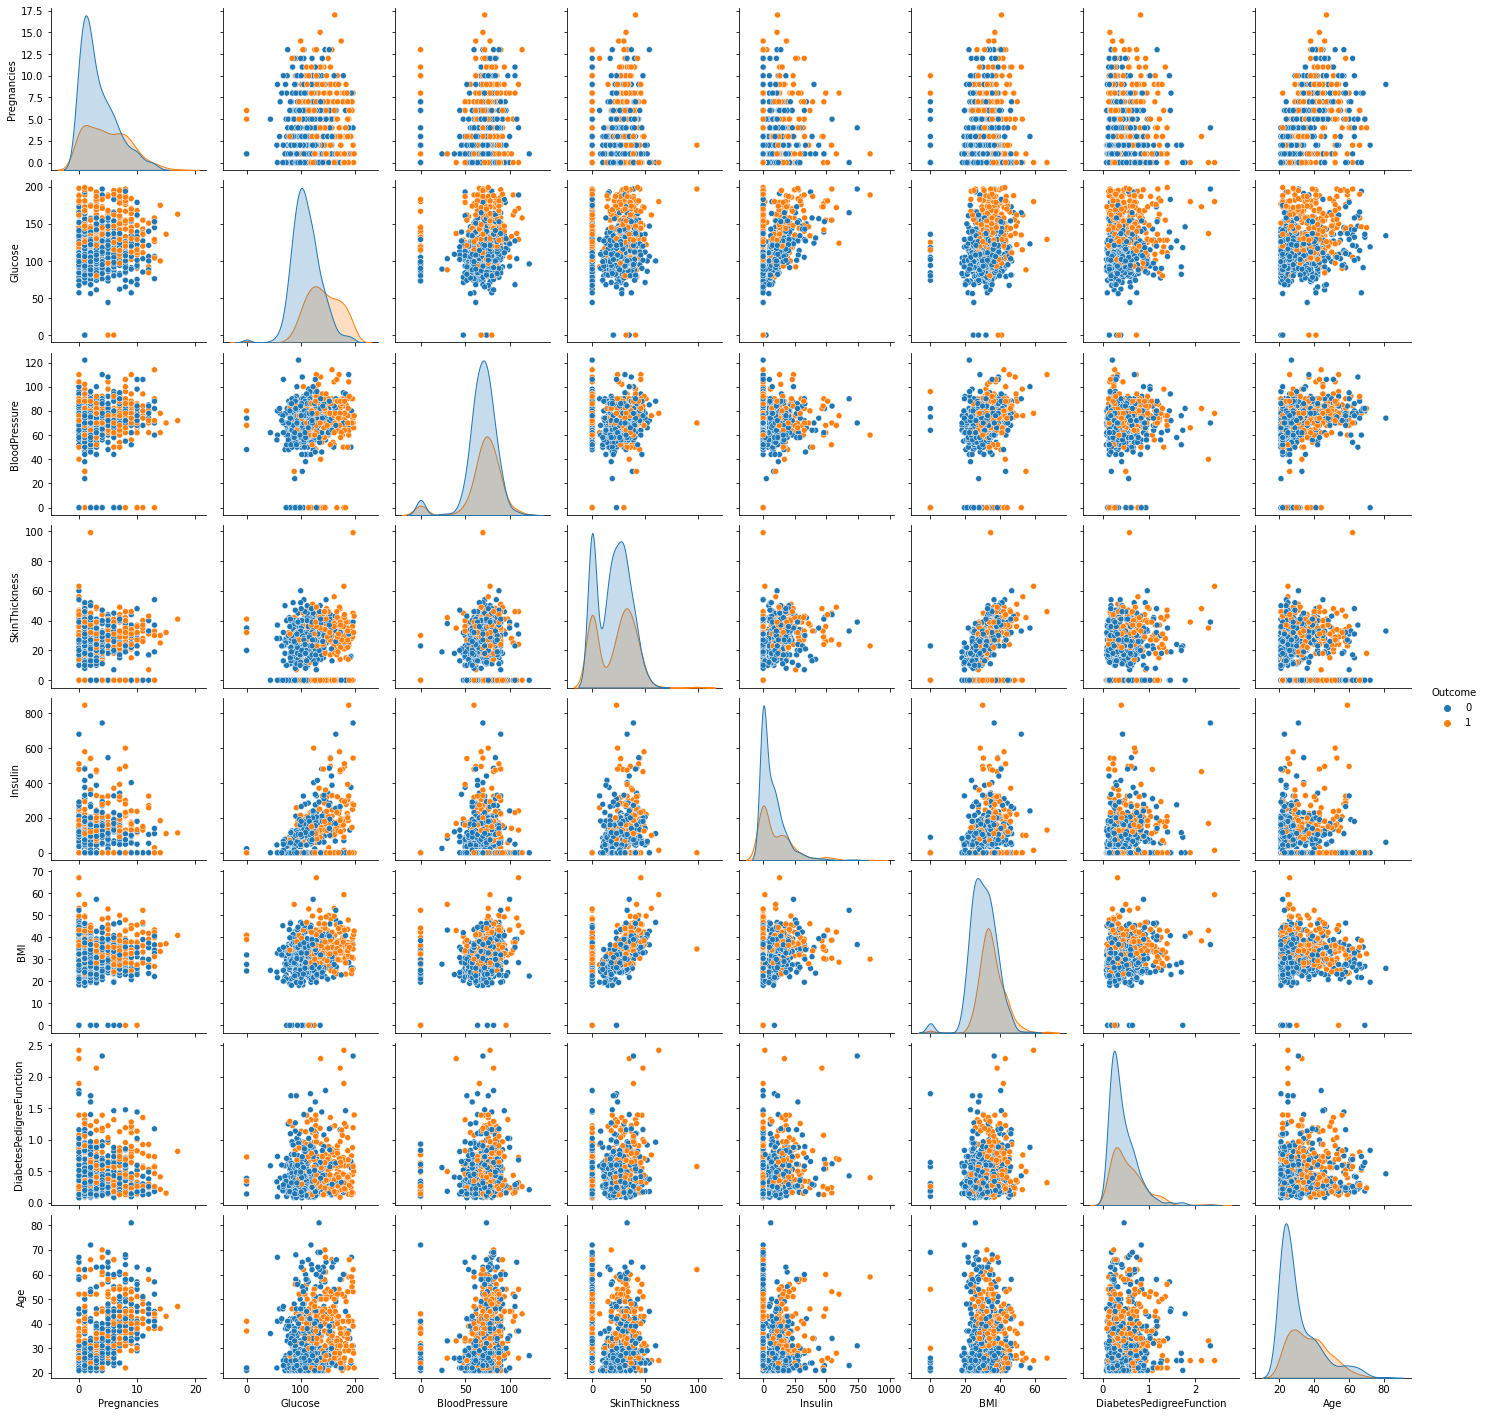

In [114]:
sns.pairplot(kind='scatter',data=data,hue='Outcome')

In [115]:
np.round(data.describe(),3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


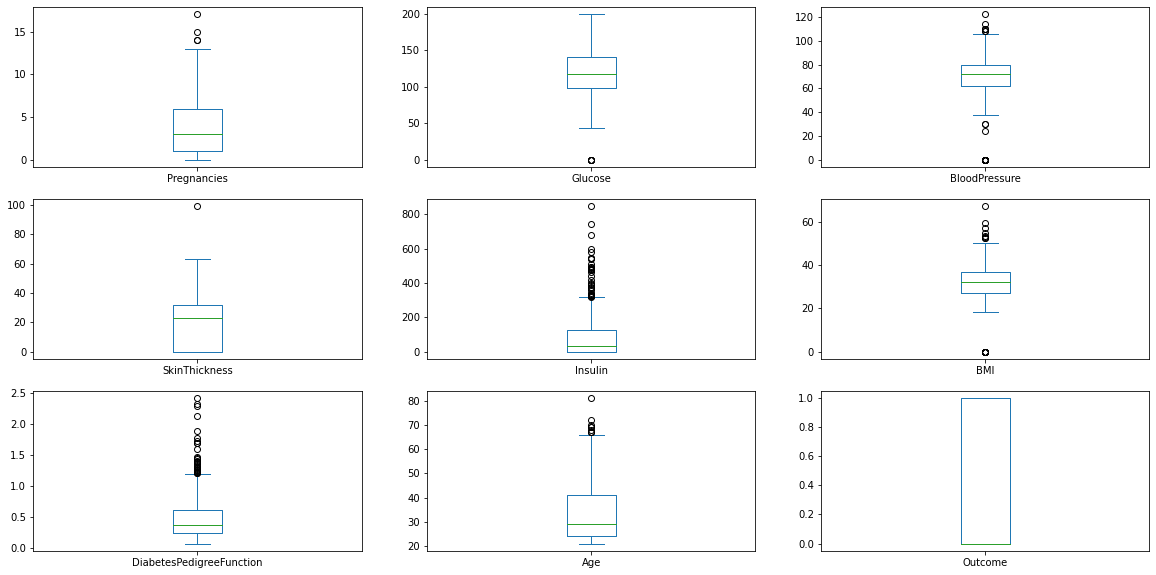

In [116]:
data.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,10))
plt.show()

From Boxplot we get that there are outliers which needs to be removed before processing in KNN Algorithm.

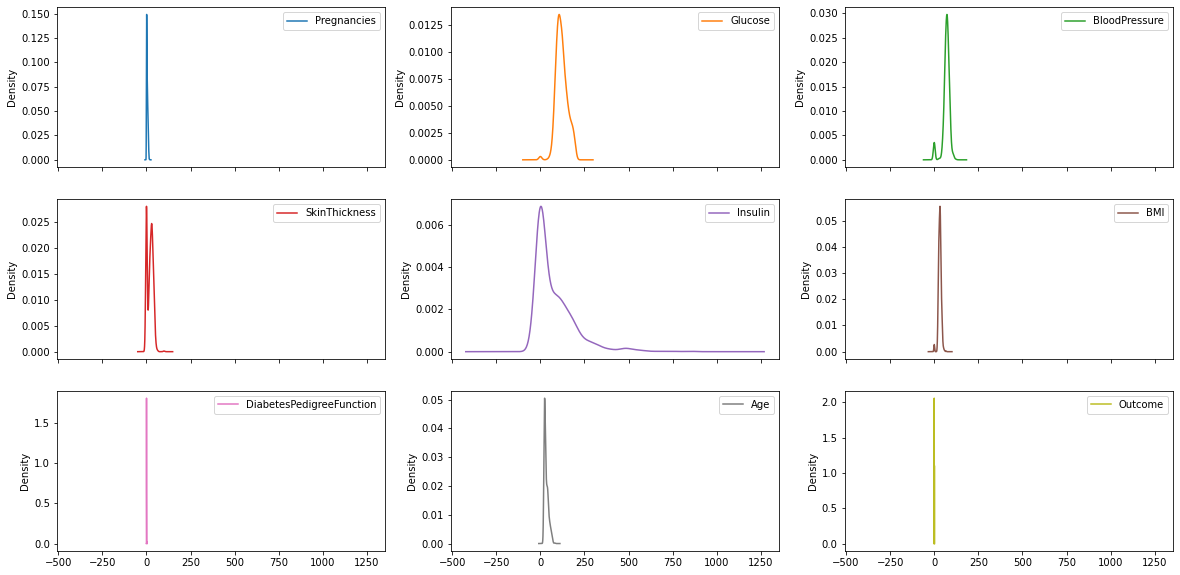

In [117]:
data.plot(kind='kde',subplots=True,layout=(3,3),figsize=(20,10))
plt.show()

Kde plot shows diffrent scaling of variables which means for KNN algorithm we need to Scale and  standardize them

In [118]:
np.round(data.corr(),3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


<AxesSubplot:>

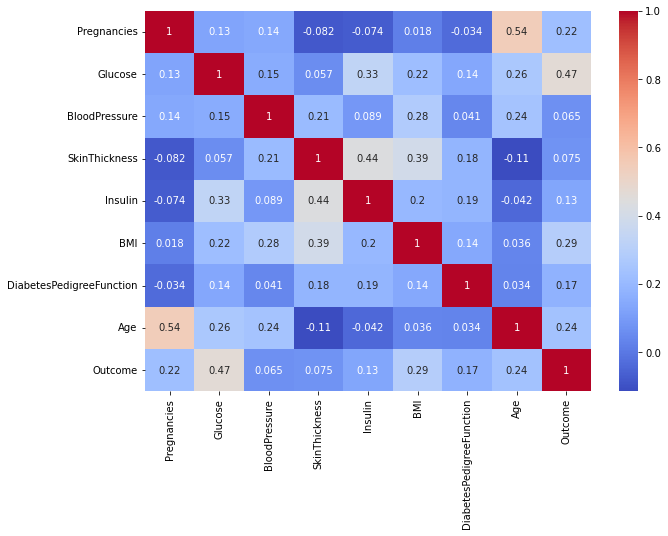

In [119]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

# 4.DATA PREPROCESSING

4.1 Dealing with Outliers

In [120]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
np.round(data.describe(),3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


A basic review about IQR,75th AND 25th percentile

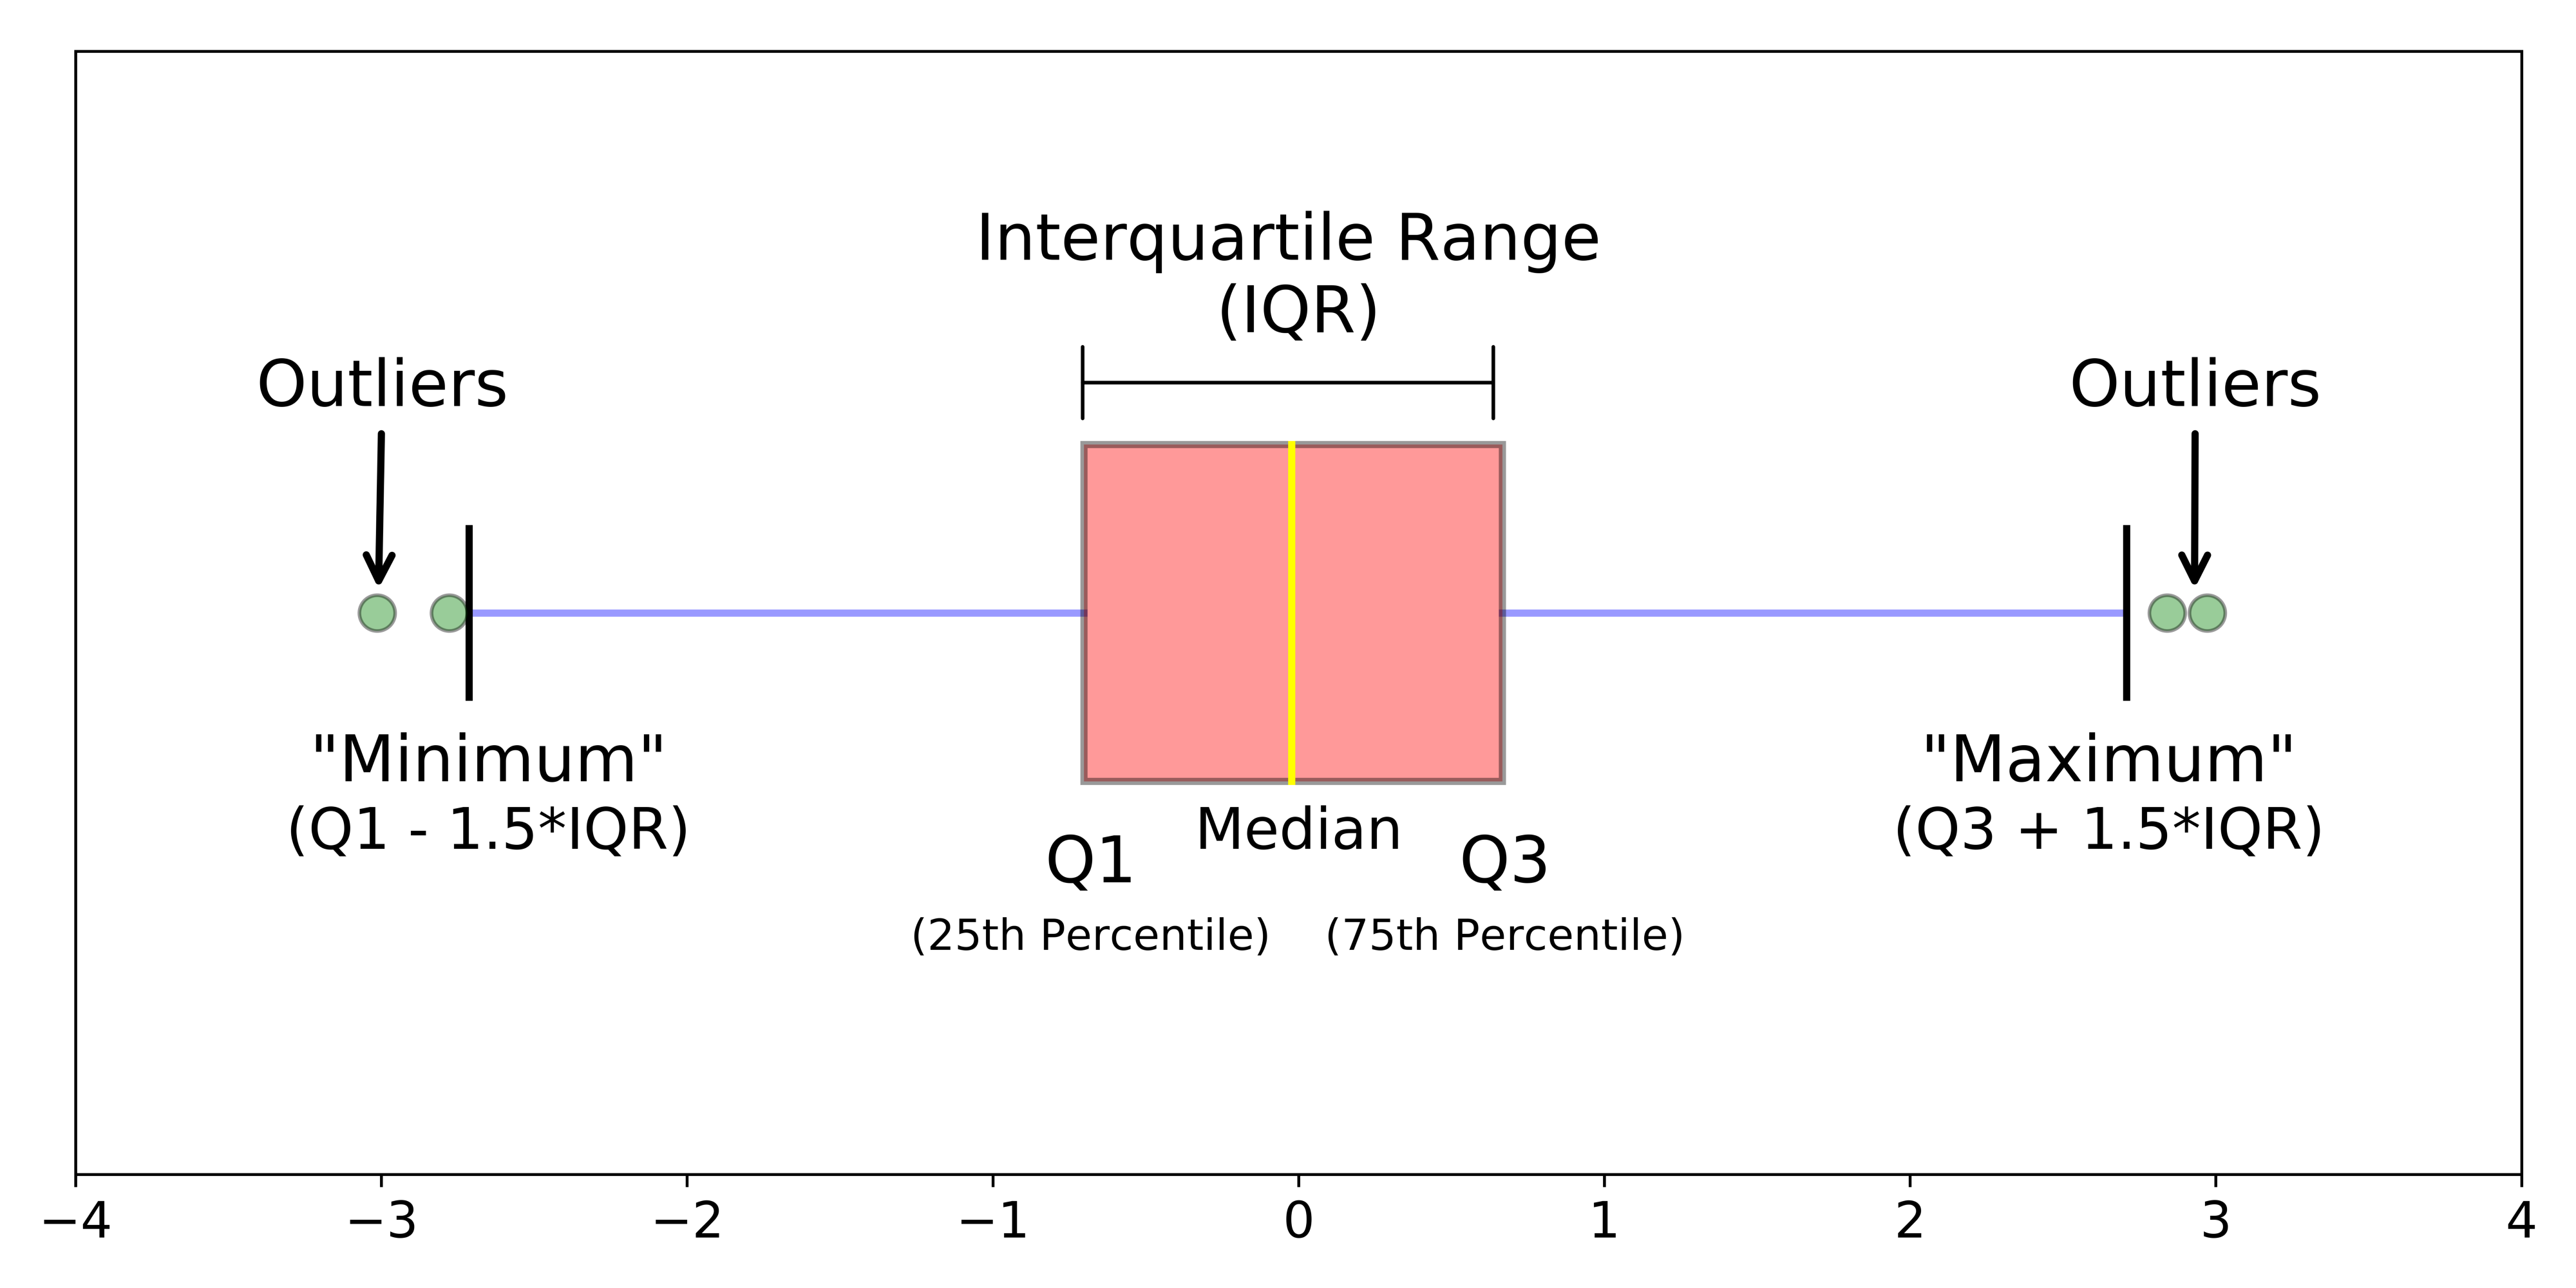

In [122]:
data['Glucose'].quantile(0.75),data['Glucose'].quantile(0.25)

(140.25, 99.0)

In [123]:
IQR=data['Glucose'].quantile(0.75)-data['Glucose'].quantile(0.25)
IQR


41.25

Taking features from where outliers need to be removed

In [124]:
feature=list(data.columns)
feature.pop()

'Outcome'

In [125]:
feature

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Some 0 values are there in column which need to be replaced with mean because 0 can not be possible.
example 0 insulin can not be possible

In [126]:
for i in feature:
    data[i]=data[i].replace(0,np.NaN)
    mean=int(data[i].mean(skipna=True))
    data[i]=data[i].replace(np.NaN,mean)

IQR of different columns

In [127]:
for i in feature:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    print(IQR)

4.0
40.5
16.0
7.0
33.5
9.100000000000001
0.38249999999999995
17.0


In [128]:
feature

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [129]:

Q1=data.Pregnancies.quantile(0.25)
Q3=data.Pregnancies.quantile(0.75)
IQR=Q3-Q1
data=data[(data.Pregnancies>=Q1-1.5*IQR) & (data.Pregnancies<=Q3+1.5*IQR)]

Q1=data.Glucose.quantile(0.25)
Q3=data.Glucose.quantile(0.75)
IQR=Q3-Q1
data=data[(data.Glucose>=Q1-1.5*IQR) & (data.Glucose<=Q3+1.5*IQR)]

Q1=data.BloodPressure.quantile(0.25)
Q3=data.BloodPressure.quantile(0.75)
IQR=Q3-Q1
data=data[(data.BloodPressure>=Q1-1.5*IQR) & (data.BloodPressure<=Q3+1.5*IQR)]

Q1=data.SkinThickness.quantile(0.25)
Q3=data.SkinThickness.quantile(0.75)
IQR=Q3-Q1
data=data[(data.SkinThickness>=Q1-1.5*IQR) & (data.SkinThickness<=Q3+1.5*IQR)]

Q1=data.Insulin.quantile(0.25)
Q3=data.Insulin.quantile(0.75)
IQR=Q3-Q1
data=data[(data.Insulin>=Q1-1.5*IQR) & (data.Insulin<=Q3+1.5*IQR)]

Q1=data.BMI.quantile(0.25)
Q3=data.BMI.quantile(0.75)
IQR=Q3-Q1
data=data[(data.BMI>=Q1-1.5*IQR) & (data.BMI<=Q3+1.5*IQR)]

Q1=data.DiabetesPedigreeFunction.quantile(0.25)
Q3=data.DiabetesPedigreeFunction.quantile(0.75)
IQR=Q3-Q1
data=data[(data.DiabetesPedigreeFunction>=Q1-1.5*IQR) & (data.DiabetesPedigreeFunction<=Q3+1.5*IQR)]

Q1=data.Age.quantile(0.25)
Q3=data.Age.quantile(0.75)
IQR=Q3-Q1
data=data[(data.Age>=Q1-1.5*IQR) & (data.Age<=Q3+1.5*IQR)]



In [75]:
for i in feature:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    data=data[(data[i]>=Q1-1.5*IQR) & (data[i]<=Q3+1.5*IQR)]

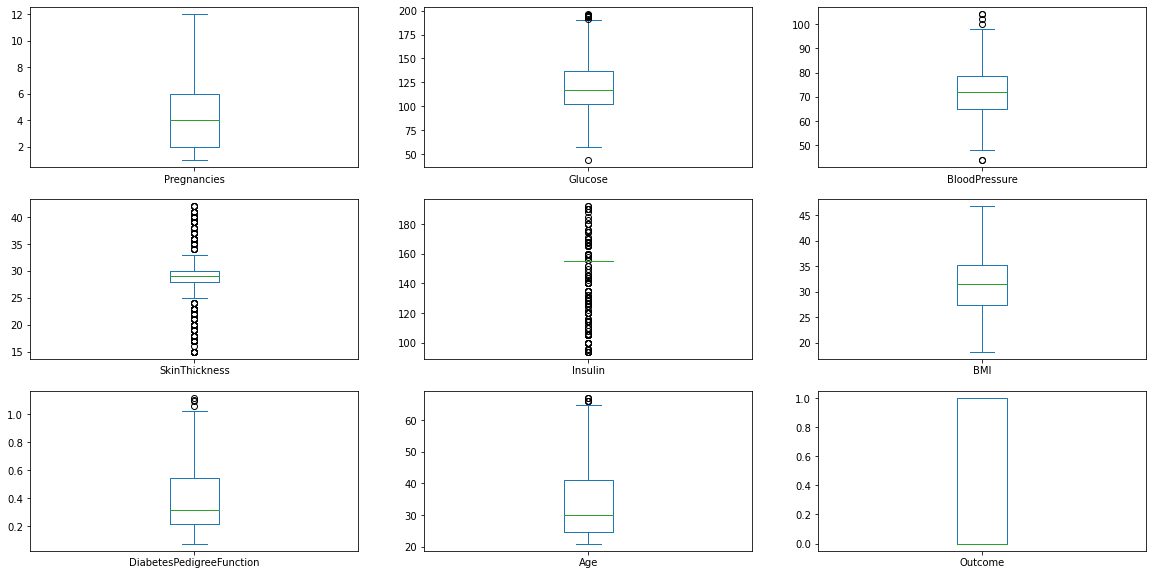

In [130]:
data.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,10))
plt.show()

In [131]:
np.round(data.describe(),3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,452.000,452.000,452.000,452.000,452.000,452.000,452.000,452.00,452.000
mean,4.591,120.741,72.434,28.816,149.750,31.646,0.394,34.08,0.345
std,2.741,28.054,10.596,5.327,17.292,5.869,0.230,11.76,0.476
min,1.000,44.000,44.000,15.000,94.000,18.200,0.078,21.00,0.000
25%,2.000,102.000,65.000,28.000,155.000,27.400,0.219,24.75,0.000
50%,4.000,116.500,72.000,29.000,155.000,31.600,0.314,30.00,0.000
75%,6.000,137.250,78.500,30.000,155.000,35.300,0.542,41.00,1.000
max,12.000,196.000,104.000,42.000,192.000,46.800,1.114,67.00,1.000


4.2 Standardization because of KNN algo

In [135]:
data.shape

(452, 9)

In [132]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((361, 8), (91, 8), (361,), (91,))

In [136]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [137]:
x_train_scaled

array([[-0.20416169, -0.65803468, -1.17705421, ..., -1.34179372,
         2.47931486, -0.10275895],
       [ 2.02924344,  0.10256952, -0.22815611, ..., -0.11793995,
        -0.80916521,  0.57324979],
       [-0.20416169, -1.59150347, -0.98727459, ...,  0.38194399,
        -0.00541055, -0.77876768],
       ...,
       [-0.20416169,  2.10779876, -0.03837649, ..., -0.58334913,
        -0.77891638,  0.15074433],
       [-1.32086425, -0.45059717, -1.36683383, ..., -0.56611175,
        -0.74866755, -1.03227096],
       [ 0.54030669,  0.41372578, -0.22815611, ...,  0.62326726,
         0.64709994, -0.44076332]])

Just to check what standardization does

In [138]:
x_train_scaled_pd=pd.DataFrame(x_train_scaled,columns=x.columns)

In [139]:
np.round(x_train_scaled_pd.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0
mean,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-3.0,-3.0,-3.0,-3.0,-2.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-0.0,0.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
75%,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
max,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0


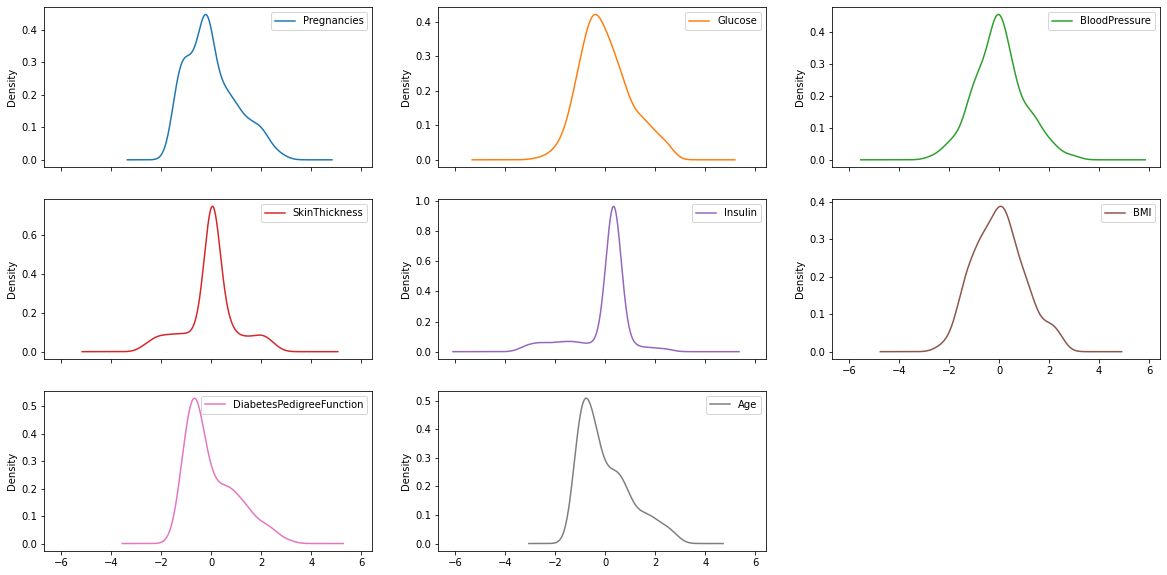

In [140]:
x_train_scaled_pd.plot(kind='kde',subplots=True,layout=(3,3),figsize=(20,10))
plt.show()

Check the differnce from above KDE plot.Below KDE plot shows scaled dataset

# 5.MODEL BUILDING

In [141]:
x_train.shape

(361, 8)

In [142]:
np.sqrt(361)

19.0

Since this give  n to be 19 but I have tuned after the plot(later)

In [143]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)
y_pred=knn.predict(x_test_scaled)

# 6.VALIDATION 

In [144]:
accuracy_score(y_test,y_pred)

0.7802197802197802

In [145]:
confusion_matrix(y_test,y_pred)

array([[52,  8],
       [12, 19]], dtype=int64)

In [146]:
from sklearn.metrics import precision_score,recall_score

In [147]:
print('precision_score',precision_score(y_test,y_pred))
print('recall_score'   ,recall_score(y_test,y_pred))
print('f1_score'       ,f1_score(y_test,y_pred))

precision_score 0.7037037037037037
recall_score 0.6129032258064516
f1_score 0.6551724137931035


In [148]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        64
           1       0.61      0.70      0.66        27

    accuracy                           0.78        91
   macro avg       0.74      0.76      0.75        91
weighted avg       0.79      0.78      0.78        91



In [150]:
import warnings
warnings.filterwarnings('ignore')

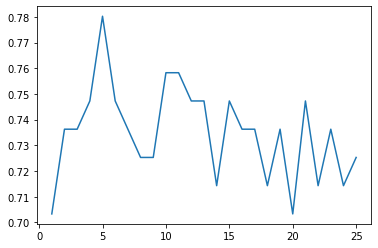

In [151]:
n=list(range(1,26))
accuracy=[]
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test_scaled)))

plt.plot(n,accuracy)

Through this plot we get to know n=5

# 7.TUNING

Model has been tuned to random state =42 ,nighbors=5 through plot

# Lets make some Predictions

In [164]:
def predict_diabetes():
    pregnancies=int(input())
    Glucose=int(input())
    Bp=int(input())
    Skintickness=int(input())
    Insulin=int(input())
    BMI=float(input())
    DPF=float(input())
    AGE=int(input())
    array=np.array([pregnancies,Glucose,Bp,Skintickness,Insulin,BMI,DPF,AGE]).reshape(1,8)
    array_scaled=scaler.transform(array)
    y_predicted=knn.predict(array_scaled)
    if y_predicted==1:
        print('diabetic')
    else:
        print('Not diabetic')
    

In [160]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5.0,116.0,74.0,29.0,155.0,25.6,0.201,30,0
7,10.0,115.0,72.0,29.0,155.0,35.3,0.134,29,0
9,8.0,125.0,96.0,29.0,155.0,32.0,0.232,54,1


In [46]:
#checking for row number 2

In [165]:
predict_diabetes()


8
183
64
29
155
23.3
0.672
32
diabetic


In [ ]:
#row number checking for 5

In [166]:
predict_diabetes()

5
116
74
29
155
25.6
0.201
30
Not diabetic


Suppose we have have a patient ,Maria on whose data we need to predict whther she is diabetic or not.
pregnancies=4,Glucose=120,Bp=72,Skintickness=28,Insulin=150,BMI=31,DPF=0.39,AGE=34.


In [167]:
predict_diabetes()


4
120
72
28
150
31
0.39
34
Not diabetic


# 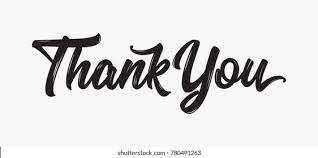